# Task#2 Supervised Machine Learning

## Linear Regression

In [15]:
#Importing all the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [16]:
#Reading the file

df = pd.read_csv('Reg.csv')

In [17]:
#Quickview of the dataset turned into dataframe

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
#Checking the number of rows and column in the dataset

df.shape

(25, 2)

#### We can see that there are 25 number of rows and 2 columns

In [19]:
# Checking the summary of the dateset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### From the summary we can analyse that:
1. Highest score of a student is 95 after studying 9.2 hours 
2. Minimum score of a student is 17 after studying 1.1 hour
3. The average score of the students is 51.48 being studying 5 hours

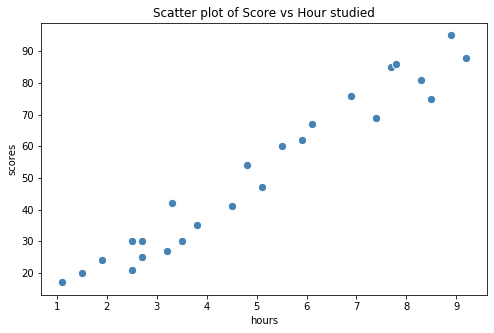

In [25]:
# Lets visualize the data using scatter plot

x = df['Hours']
y = df['Scores']

plt.figure(figsize=(8,5))
plt.scatter(x, y, c='steelblue', edgecolor='white', s=70)
plt.xlabel('hours')
plt.ylabel('scores')
plt.title('Scatter plot of Score vs Hour studied')
plt.show()

#### From the scatter plot we can see that students who spend less hours for studies scored less marks however, when studied for more hours scored more marks.

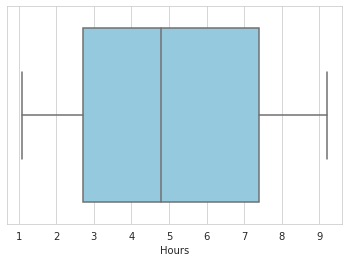

In [51]:
# Lets check the outliers if there any using box plot

sns.set_style('whitegrid')
sns.boxplot(x, color='skyblue', data=df)

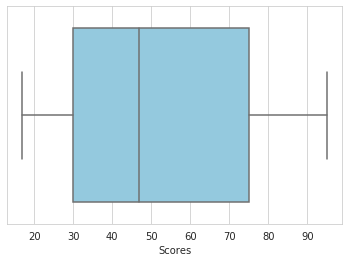

In [46]:
sns.set_style('whitegrid')
sns.boxplot(y, color='skyblue', data=df)

#### With the help of boxplot we can see that there is no outlier oin our data, we can identify this from the scatter plot also.

In [47]:
# Check if there is any null value

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### We can see that there is no null value

In [52]:
#Identifying dependent and independent variable

#Dependent variable
y = df.Scores

#Independent variable
x = df.Hours

In [54]:
#Importing the library to split data into test and train

from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [94]:
#Importing library to perform Linear Regression

from sklearn.linear_model import LinearRegression

In [95]:
#Creating the Linear Regression object

lr = LinearRegression()

In [96]:
#Fitting the model

lr.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
#lets check coeficient and intercept

print(lr.coef_)
print(lr.intercept_)

[9.91065648]
2.018160041434683


#### We can see that intercept(c)=2.75 and slope(m)=9.68

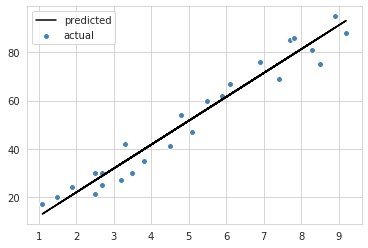

In [132]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y, c='steelblue', edgecolor='white', label='actual')
plt.plot(x, line, color='black', label='predicted')
plt.legend()
plt.show()

In [99]:
#Predicting the values

y_pred = lr.predict(x_test.values.reshape(-1,1))
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [100]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [127]:
# Testing with own data

hours = float(input('How many hours did you studied in one day (value between 1-9.5): '))
own_pred = lr.predict([[hours]])
print("Predicted Score = {}".format(own_pred[0]))

How many hours did you studied in one day (value between 1-9.5): 9.5
Predicted Score = 96.16939660753593


In [112]:
# validating the model

from sklearn.metrics import mean_absolute_error

In [133]:
mae = mean_absolute_error(y_test, y_pred)
mae

4.183859899002975